# 4.Assignment - Linear Regression

Quetion (1) 1) Delivery_time -> Predict delivery time using sorting time

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
# importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import probplot
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv(r"C:\Users\Sunita\Downloads\delivery_time (1).csv")

In [3]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
# Finding the dtypes
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
# Finding the null value
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
# Describe the data
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
data=data.rename(columns={'Delivery Time': 'delivery_time','Sorting Time': 'sorting_time' })

In [9]:
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [10]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


C:\Users\Sunita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

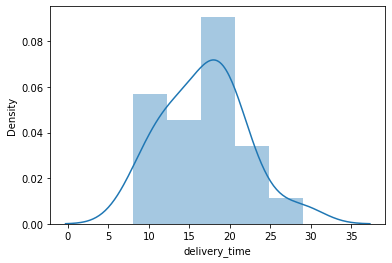

In [11]:
plt.figure(figsize=(6,4))
sns.distplot(data['delivery_time'])

C:\Users\Sunita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

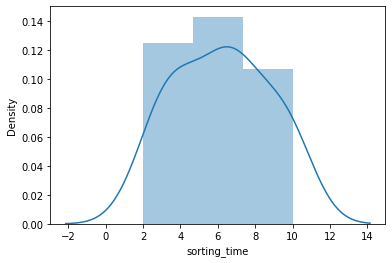

In [12]:
plt.figure(figsize=(6,4))
sns.distplot(data['sorting_time'])

# Linear regression model fitting

In [13]:
import seaborn as sns
from scipy import stats
from scipy.stats import probplot
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=data).fit()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

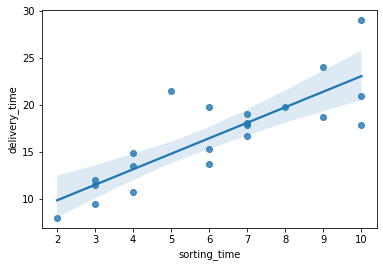

In [15]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

In [16]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [17]:
model.tvalues, model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [19]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 01 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        12:52:24   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# 95% confidence interval
model.conf_int(0.05) 

,0,1
Intercept,2.979134,10.186334
sorting_time,1.108673,2.189367


In [25]:
# Automatic Prediction for say 6 & 9 delivery_time
new_data=pd.Series([6,9])
new_data

0    6
1    9
dtype: int64

In [26]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,9


In [27]:
model.predict(data_pred)

0    16.476853
1    21.423913
dtype: float64

2) Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [28]:
# importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import probplot
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
data = pd.read_csv(r"C:\Users\Sunita\Downloads\Salary_Data(1).csv")

In [30]:
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [32]:
data.dtypes

YearsExperience    float64
Salary               int64
dtype: object

In [33]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [34]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [35]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Text(0, 0.5, 'Salary')

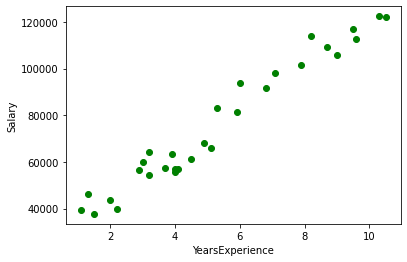

In [36]:
plt.scatter(x=data.YearsExperience, y=data.Salary, color='green')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

C:\Users\Sunita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sunita\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Density distribution of 'Salary'")

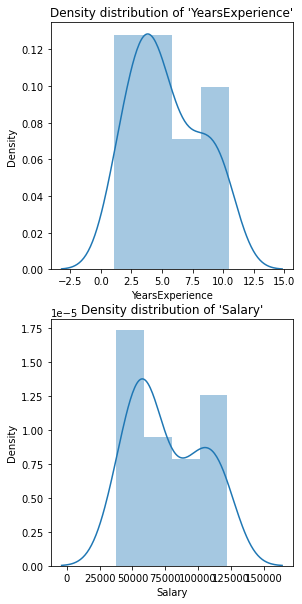

In [37]:
# Density plot
plt.figure(figsize=(20,10))
plt.subplot(2,4,2)
sns.distplot(data['YearsExperience'], kde=True)
plt.title("Density distribution of 'YearsExperience'")
plt.subplot(2,4,6)
sns.distplot(data['Salary'], kde=True)
plt.title("Density distribution of 'Salary'")

{'whiskers': [<matplotlib.lines.Line2D at 0x27901300970>,
 'caps': [<matplotlib.lines.Line2D at 0x27901300f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x27901300700>],
 'medians': [<matplotlib.lines.Line2D at 0x279013104f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x279013107c0>],
 'means': []}

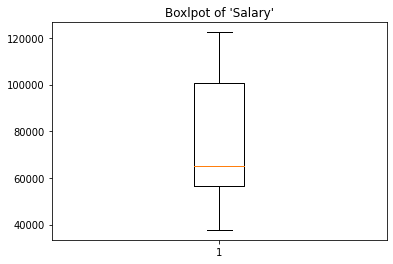

In [38]:
plt.title("Boxlpot of 'Salary'")
plt.boxplot(data['Salary'])

{'whiskers': [<matplotlib.lines.Line2D at 0x27901365220>,
 'caps': [<matplotlib.lines.Line2D at 0x279013657c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27901358f10>],
 'medians': [<matplotlib.lines.Line2D at 0x27901365d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x279013730a0>],
 'means': []}

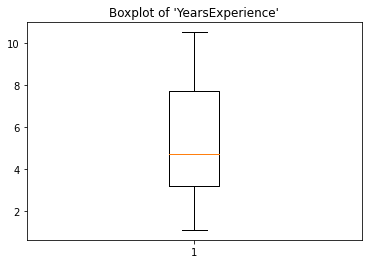

In [39]:
plt.title("Boxplot of 'YearsExperience'")
plt.boxplot(data['YearsExperience'])

Text(0.5, 1.0, "Q-Q plot of 'YearsExperience'")

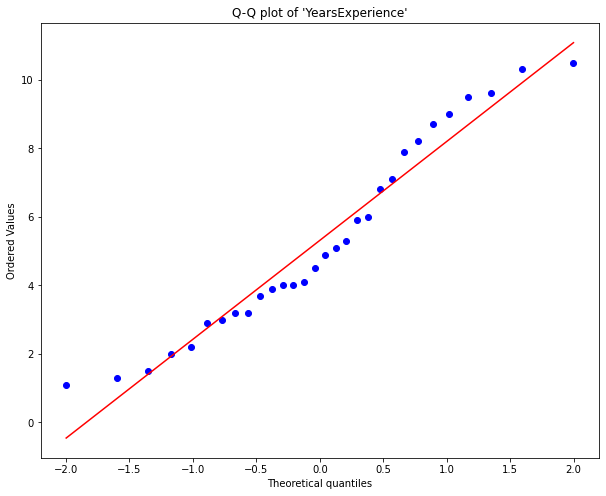

In [40]:
# Normal Q-Q plot
plt.figure(figsize=(10,8))
probplot(data['YearsExperience'], plot=plt)
plt.title("Q-Q plot of 'YearsExperience'")

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

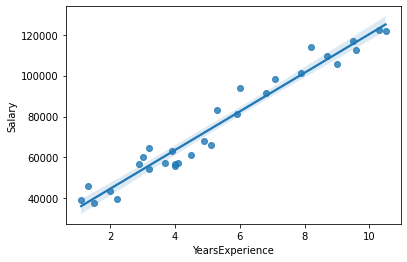

In [41]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

Text(0.5, 1.0, 'Joint plot using sns')

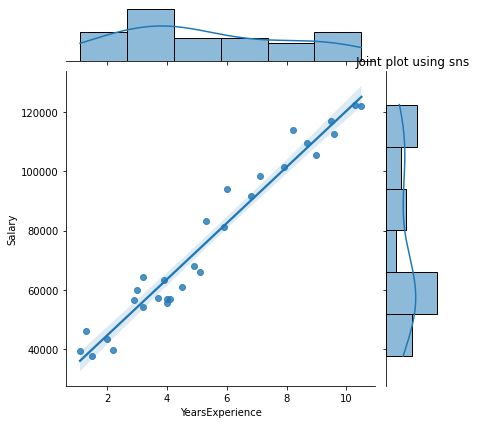

In [42]:
# Joint plot
sns.jointplot(x = "YearsExperience", y = "Salary", kind = "reg", data = data)
plt.title("Joint plot using sns")

In [182]:
# Create new columns for the normalized values
data['Norm_YearsExp'] = preprocessing.normalize(data[['YearsExperience']], axis=0)
data['Norm_Salary'] = preprocessing.normalize(data[['Salary']], axis=0)
data.head()

,YearsExperience,Salary,Norm_YearsExp,Norm_Salary
0,1.1,39343,0.033464,0.089074
1,1.3,46205,0.039549,0.104610
2,1.5,37731,0.045633,0.085424
3,2.0,43525,0.060844,0.098542
4,2.2,39891,0.066928,0.090315


In [43]:
import statsmodels.formula.api as smf
model2=smf.ols("Salary~YearsExperience",data=data).fit()

In [44]:
# Finding Cefficient Parameters
model2.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [45]:
# Finding Pvalues and tvalues
model2.tvalues, model2.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [46]:
# Finding Rsquared values
model2.rsquared , model2.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [47]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 01 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        12:54:07   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# 95% confidence interval
model2.conf_int(0.05) 

,0,1
Intercept,21136.061314,30448.339084
YearsExperience,8674.118747,10225.805896


In [49]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [50]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,6
1,9


In [51]:
model2.predict(data_pred)

0     82491.974127
1    110841.861092
dtype: float64